Linear Regression MSE:343115992982.5258
Linear Regression RMSE:585761.0374397787
Polynomial Regression MSE:395774915720.7251
Polynomial Regression RMSE:629106.4422820077


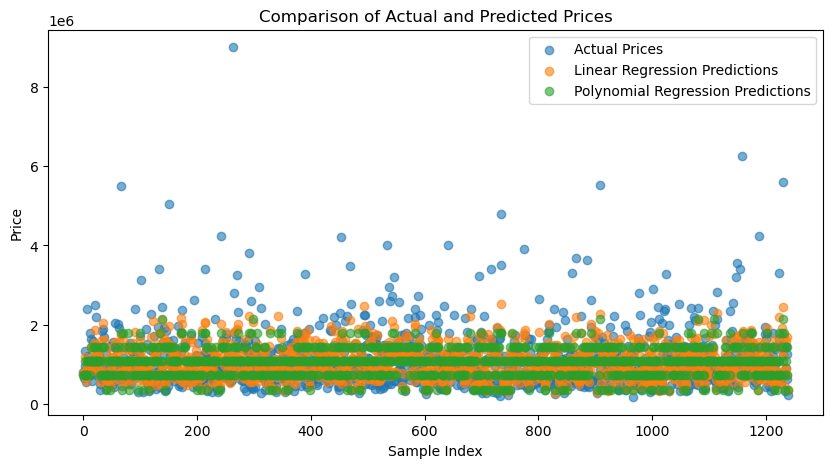

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path="D:/ACM/archive/melb_data.csv"
data=pd.read_csv(file_path)

data=data.dropna(axis=0)

y=data['Price']
features=['Rooms','Bathroom','Landsize','Lattitude','Longtitude']
X=data[features]

X=(X-X.mean())/X.std()

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y=train_test_split(X,y,test_size=0.2,random_state=0)

train_X,val_X=train_X.to_numpy(),val_X.to_numpy()
train_y,val_y=train_y.to_numpy(),val_y.to_numpy()

class LinearRegressionScratch:
    def __init__(self,learning_rate=0.01,iterations=1000):
        self.learning_rate=learning_rate
        self.iterations=iterations
        self.theta=None
    
    def compute_cost(self,X,y):
        m=len(y)
        predictions=X.dot(self.theta)
        cost=(1/(2*m))*np.sum((predictions-y)**2)
        return cost
    
    def fit(self,X,y):
        m,n=X.shape
        X=np.c_[np.ones((m,1)),X]
        self.theta=np.zeros(n+1)
        
        for _ in range(self.iterations):
            gradients=(1/m)*X.T.dot(X.dot(self.theta)-y)
            self.theta-=self.learning_rate*gradients
    
    def predict(self,X):
        m=X.shape[0]
        X=np.c_[np.ones((m,1)),X]
        return X.dot(self.theta)

lr=LinearRegressionScratch(learning_rate=0.01,iterations=1000)
lr.fit(train_X,train_y)
predictions=lr.predict(val_X)

mse=np.mean((predictions-val_y)**2)
rmse=np.sqrt(mse)
print(f"Linear Regression MSE:{mse}")
print(f"Linear Regression RMSE:{rmse}")

from numpy.polynomial.polynomial import Polynomial

poly_degree=2
poly=Polynomial.fit(train_X[:,0],train_y,deg=poly_degree)
poly_predictions=poly(val_X[:,0])

poly_mse=np.mean((poly_predictions-val_y)**2)
poly_rmse=np.sqrt(poly_mse)

print(f"Polynomial Regression MSE:{poly_mse}")
print(f"Polynomial Regression RMSE:{poly_rmse}")

plt.figure(figsize=(10, 5))
plt.scatter(range(len(val_y)),val_y,label="Actual Prices",alpha=0.6)
plt.scatter(range(len(predictions)),predictions,label="Linear Regression Predictions",alpha=0.6)
plt.scatter(range(len(poly_predictions)),poly_predictions,label="Polynomial Regression Predictions",alpha=0.6)
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Comparison of Actual and Predicted Prices")
plt.show()
